<a href="https://colab.research.google.com/github/HoangHungLN/MachineLearning_Assigment/blob/main/notebooks/Assignment1_CEML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Xử lý dữ liệu
  #Thêm thư viện
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")
!mkdir modules
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/__init__.py -O modules/__init__.py
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/feature_extractors.py -O modules/feature_extractors.py
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/model_runner.py -O modules/model_runner.py
from modules.model_runner import *
from modules.feature_extractors import *
dataset_url = "https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/data/mobiles_uncleaned.csv"
raw_data = pd.read_csv(dataset_url)
raw_data = raw_data.replace({r'â€‰':'', r'\u2009': ''}, regex=True)
  #in ra vài dòng của dữ liệu
raw_data.head(5)

mkdir: cannot create directory ‘modules’: File exists
--2025-09-18 14:46:02--  https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/__init__.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456 [text/plain]
Saving to: ‘modules/__init__.py’

modules/__init__.py 100%[===================>]     456  --.-KB/s    in 0s      

2025-09-18 14:46:02 (1.12 MB/s) - ‘modules/__init__.py’ saved [456/456]

--2025-09-18 14:46:02--  https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/feature_extractors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

,name,price,spec_score,user_rating,connectivity,cpu,ram,battery,display,camera,expandable,os,fm_radio,other
0,Samsung Galaxy S24 FE 5G,34999,84.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Exynos 2400e, Deca Core, 3.11GHz Processor","8GB RAM, 128GB inbuilt",4700mAh Battery with 25W Fast Charging,"6.7 inches, 1080x2340px, 120 Hz Display with P...",50MP + 12MP + 8MP Triple Rear & 10MP Front Camera,Memory Card Not Supported,Android v14,NaN,NaN
1,Samsung Galaxy S24 Ultra,84949,92.0,4.35,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen3, Octa Core, 3.3GHz Processor","12GB RAM, 256GB inbuilt",5000mAh Battery with 45W Fast Charging,"6.8 inches, 1440x3120px, 120 Hz Display with P...",200MP Quad Rear & 12MP Front Camera,Memory Card Not Supported,Android v14,NaN,NaN
2,Samsung Galaxy S25 Edge,109999,89.0,4.45,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8Elite, Octa Core, 4.47GHz Processor","12GB RAM, 256GB inbuilt",3900mAh Battery with 25W Fast Charging,"6.7 inches, 1440x3120px, 120 Hz Display with P...",200MP + 12MP Dual Rear & 12MP Front Camera,NaN,Android v15,No FM Radio,NaN
3,Samsung Galaxy M36 5G,19990,82.0,4.55,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1380, Octa Core, 2.4GHz Processor","8GB RAM, 128GB inbuilt",6500mAh Battery with 25W Fast Charging,"6.74 inches, 1080x2340px, 120 Hz Display with ...",50MP + 12MP + 5MP Triple Rear & 16MP Front Camera,"Memory Card (Hybrid), upto 1TB",Android v15,NaN,NaN
4,Samsung Galaxy M06 5G,7999,72.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6300, Octa Core, 2.4GHz Processor","4GB RAM, 128GB inbuilt",5000mAh Battery with 25W Fast Charging,"6.74 inches, 720x1600px, 90 Hz Display with Wa...",50MP + 2MP Dual Rear & 8MP Front Camera,"Memory Card (Hybrid), upto 1.5TB",Android v15,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
  #kiểm tra số lượng mẫu và thuộc tính gốc của dữ liệu
  print ("Số lượng mẫu có trong dataset là:", raw_data.shape[0])
  print ("Số lượng thuộc tính có trong dataset là:", raw_data.shape[1])


Số lượng mẫu có trong dataset là: 11786
Số lượng thuộc tính có trong dataset là: 14


Trong bộ dữ liệu này, các thuộc tính bị thiếu được kí hiệu là NULL, sau đây nhóm em sẽ tiến hành chuyển dữ liệu thiếu thành NaN để dễ thống kê

In [ ]:
raw_data.replace("NULL", np.nan, inplace=True)
missing_count = raw_data.isna().sum()
print(missing_count)

name                0
price               0
spec_score          8
user_rating        20
connectivity       11
cpu              2157
ram              1261
battery           138
display            16
camera             20
expandable       1770
os               2963
fm_radio        10229
other           11785
dtype: int64


Để trực quan hóa thì nhóm sẽ tạo dữ liệu dạng bảng để thống kê các giá trị bị thiếu
  

In [ ]:
missing_rate = (missing_count / len(raw_data) * 100).round(2)
missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Rate': missing_rate}).sort_values(by='Missing Rate', ascending=False)
missing_data.index.name = 'Feature'
#in ra bảng giá trị missing value
missing_data

,Missing Count,Missing Rate
Feature,,
other,11785,99.99
fm_radio,10229,86.79
os,2963,25.14
cpu,2157,18.30
expandable,1770,15.02
ram,1261,10.70
battery,138,1.17
user_rating,20,0.17
camera,20,0.17


In [ ]:
print ("\n-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------")
mum_summary = raw_data.describe().round(2).T.reset_index()
mum_summary = mum_summary.rename(columns={'index': 'Feature'}).set_index('Feature')
mum_summary



-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
price,11786.0,17187.61,23707.84,178.0,3000.00,9490.00,20999.0,480000.0
spec_score,11778.0,51.94,26.66,3.0,24.00,58.00,76.0,98.0
user_rating,11766.0,4.18,0.48,0.5,4.05,4.25,4.5,5.0


Khi chạy lệnh nêu các đặc trưng của các biến định lượng thì ra thấy được rằng


1.   Về thuộc tính giá (price)

  *   Giá trị trung bình của các điện thoại là 117187,61

  *   Độ lệch chuẩn của thuộc tính khá lớn (23707,84) cho thấy dữ liệu phân tán mạnh, không tập trung xung quanh giá trị trung bình
  
  * Nhiều khả năng tồn tại giá trị ngoại lai với mức giá quá cao hoặc quá thấp,dẫn đến phân phối bị lệch và kéo giá trị trung bình lên khá cao so với giá trị trung vị 9490


2.   Về thuộc tính điểm cấu hình (spec_score)

  * Giá trị trung bình của điểm cấu hình là 51,94 điểm, trung vị là 58 điểm
  * Độ lệch chuẩn là 26,66 được xem là khá lớn so với thang điểm 100, điều này có thấy dữ liệu trải rộng
  *Nhìn chung, vì giá trị trung bình nhỏ hơn trung vị nên phân phối có xu hướng lệch trái, nhưng vẫn cần sử dụng đồ thij để trực quan hơn

3. Về thuộc tính đánh giá của khách hàng (user_rating)
* Giá trị trung bình của đánh giá người dùng là 4.18 trên thang điểm 5, với trung vị là 4,25
* Độ lệch chuẩn nhỏ (0.48) cho thấy tập dữ liệu tập trung xung quanh giá trị trung bình
* Phân phối nghiên về các giá trị cao cho thấy điện thoại trong tập dữ liệu nhận được nhiều đánh giá tích cực từ người dùng, ít khi bị điểm thấp


In [ ]:
#Thêm thư viện để hiển thị đẹp trong Colab

cat_summary = raw_data.describe(include='object').T.reset_index()  # transpose để cột thành hàng
cat_summary = cat_summary.rename(columns={'index': 'Feature'}).set_index('Feature') #đổi tên cột index thành Feature
print ("\n-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------")
cat_summary


-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------


,count,unique,top,freq
Feature,,,,
name,11786,11468,Realme 9i 5G (6GB RAM + 128GB),3
connectivity,11775,68,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",2554
cpu,9629,1461,"Quad Core, 1.3GHz Processor",399
ram,10525,443,"8GB RAM, 128GB inbuilt",1143
battery,11648,955,1000mAh Battery,695
display,11770,1751,"2.4 inches, 240x320px Display",681
camera,11766,1142,0.3MP Rear Camera,1227
expandable,10016,31,"Memory Card Supported, upto 32GB",2261
os,8823,184,Android v11,818


Khi chạy thống kê mô tả của các biến định tính ta thấy rằng:
* _name_ : có 11,468 giá trị duy nhất trên 11,786 dòng (gần như mỗi dòng là một model khác nhau). Điều này làm cột này không hữu ích để phân tích thống kê hoặc mô hình hóa (có thể bỏ hoặc chỉ dùng để tham khảo).

* _connectivity_ : gồm 68 loại, trong đó phổ biến nhất là “Dual Sim, 3G, 4G, VoLTE, Wi-Fi” (≈ 2,554 bản ghi). Đây là một thuộc tính có thể mã hóa và sử dụng.

* _cpu_ : có 1,461 loại, phổ biến nhất là “Quad Core, 1.3 GHz Processor” (~399 bản ghi). Tuy nhiên cột này có nhiều missing values (chỉ 9,629/11,786 bản ghi).

* _ram_ : gồm 443 loại, phổ biến nhất “8 GB RAM, 128 GB inbuilt” (~1,143 bản ghi). Thuộc tính này khá chi tiết nhưng còn phân mảnh nhiều.

* _battery_ : gồm 955 loại, phổ biến nhất “1000 mAh Battery” (~695 bản ghi). Có nhiều kiểu pin khác nhau, dữ liệu phân tán.

* _display_ : gồm 1,751 loại, phổ biến nhất “2.4 inches, 240x320px Display” (~681 bản ghi). Đa dạng, có thể cần chuẩn hóa (inch + độ phân giải tách riêng).

* _camera_ : gồm 1,142 loại, phổ biến nhất “0.3 MP Rear Camera” (~1,227 bản ghi). Dữ liệu có xu hướng cụ thể nhưng nhiều dạng trình bày khác nhau.

* _expandable_ : gồm 31 loại, phổ biến nhất “Memory Card Supported, upto 32GB” (~2,261 bản ghi). Đây là một biến categorical khá gọn.

* _os_ : gồm 184 loại, phổ biến nhất “Android v11” (~818 bản ghi). Có nhiều phiên bản Android khác nhau, cần chuẩn hóa nhóm.

* _fm_radio_ : dữ liệu khá thiếu, chỉ 1,557 bản ghi có thông tin (toàn bộ là “No FM Radio”). Giá trị phân loại này không đa dạng.

* _other_ : toàn bộ chỉ có một giá trị “Wi-Fi” → không có giá trị phân biệt, có thể bỏ khỏi mô hình

Qua đây ta có nhận xét rằng: Các thuộc tính như tên sản phẩm (name), fm radio và other có thể cân nhắc để loại bỏ ra khỏi mô hình. Ngoài ra cần chuẩn hóa các thuộc tính khác để có thể đem lại kết quả tốt nhất khi huấn luyện mô hình

Nhóm em tiến hành vẽ các biểu đồ để nhận xét mối uan hệ giữa các biến

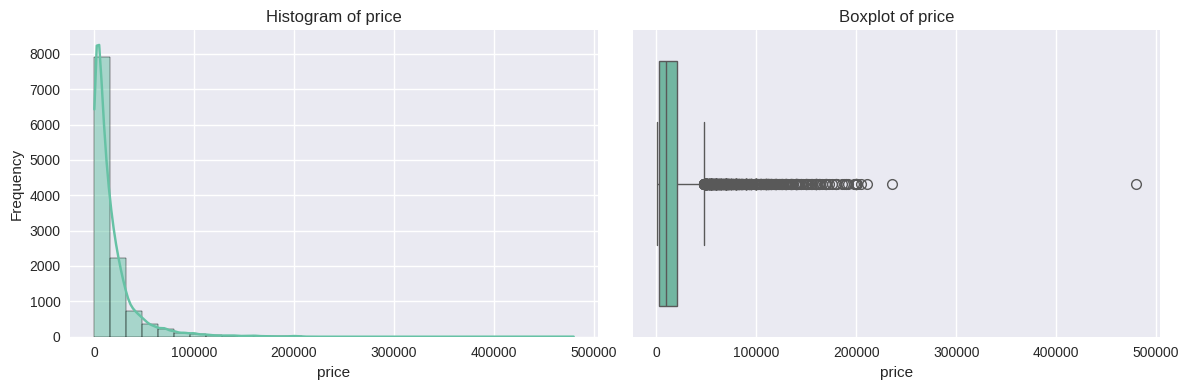

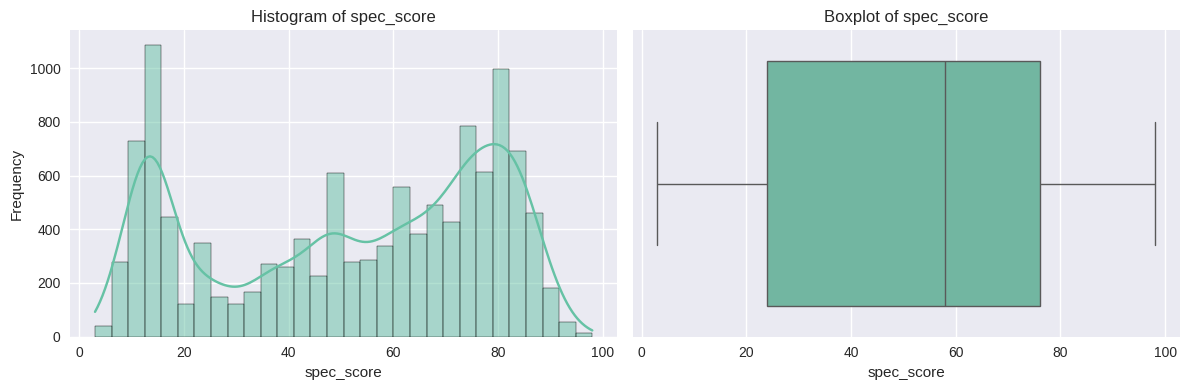

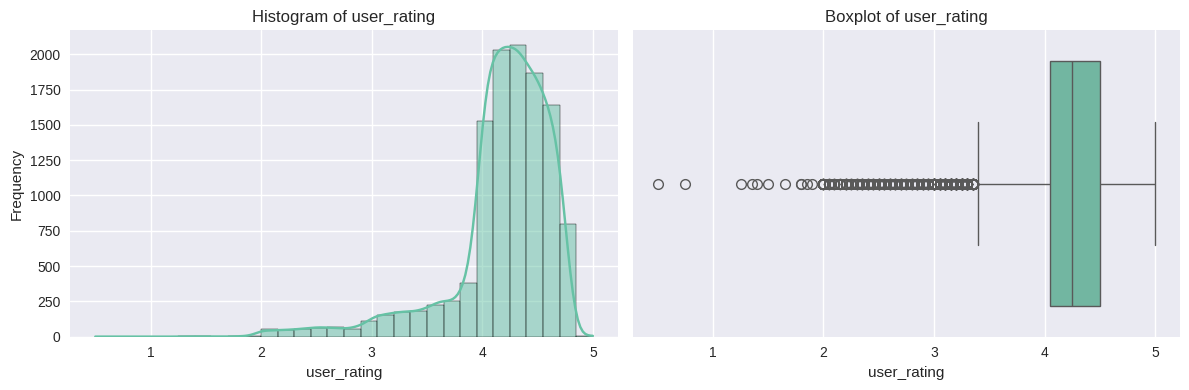

In [ ]:
num_cols = raw_data.select_dtypes(include='number').columns

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 hàng 2 cột

    # Histogram + KDE
    sns.histplot(raw_data[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(x=raw_data[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

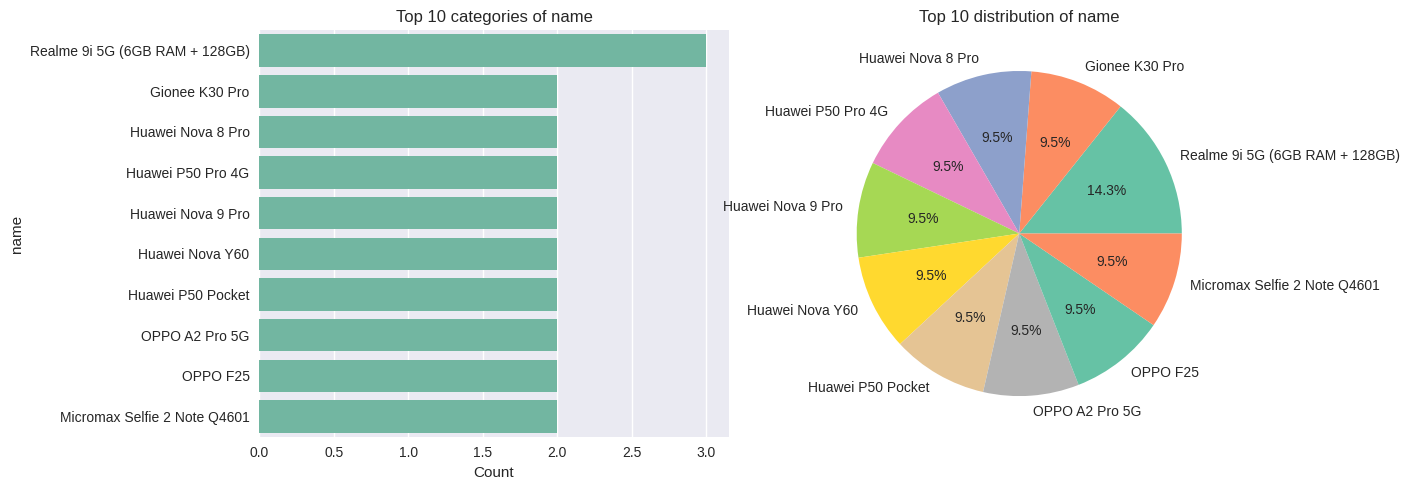

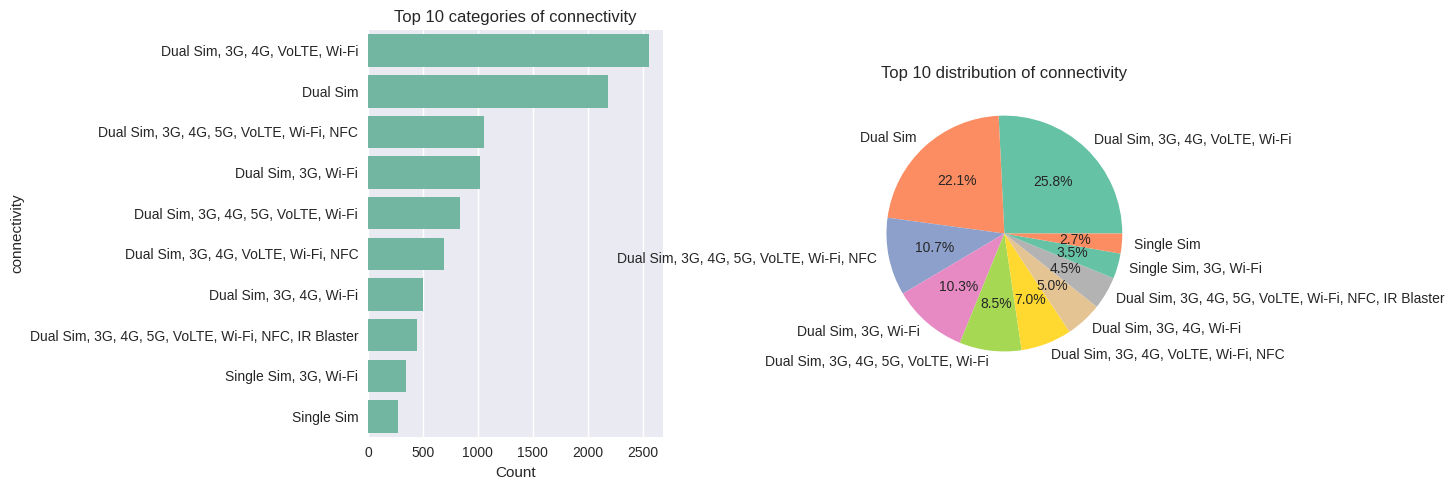

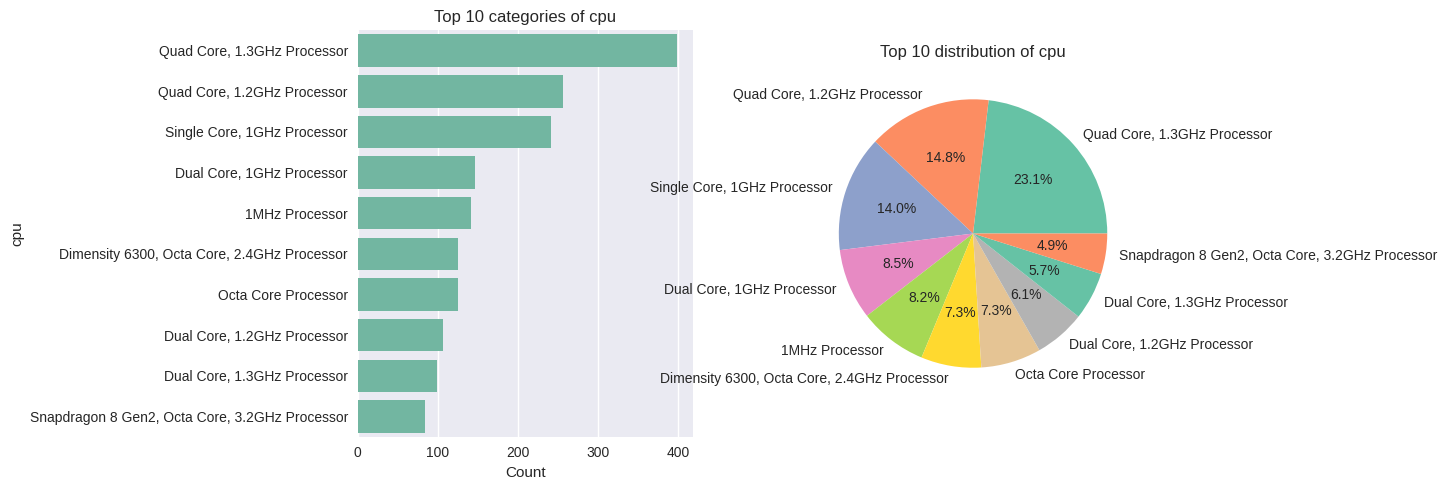

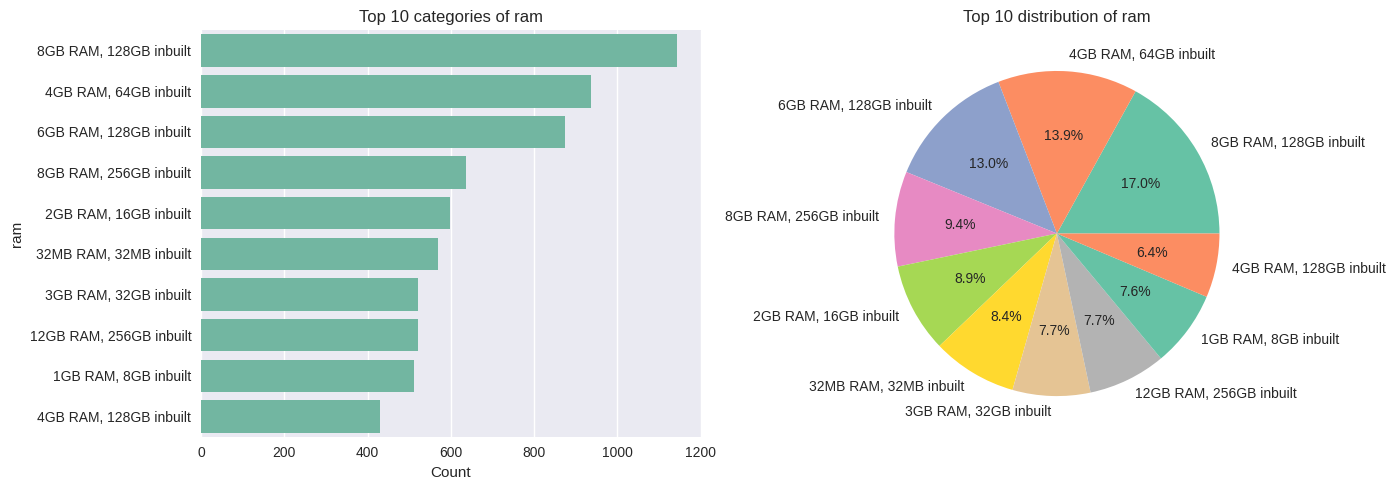

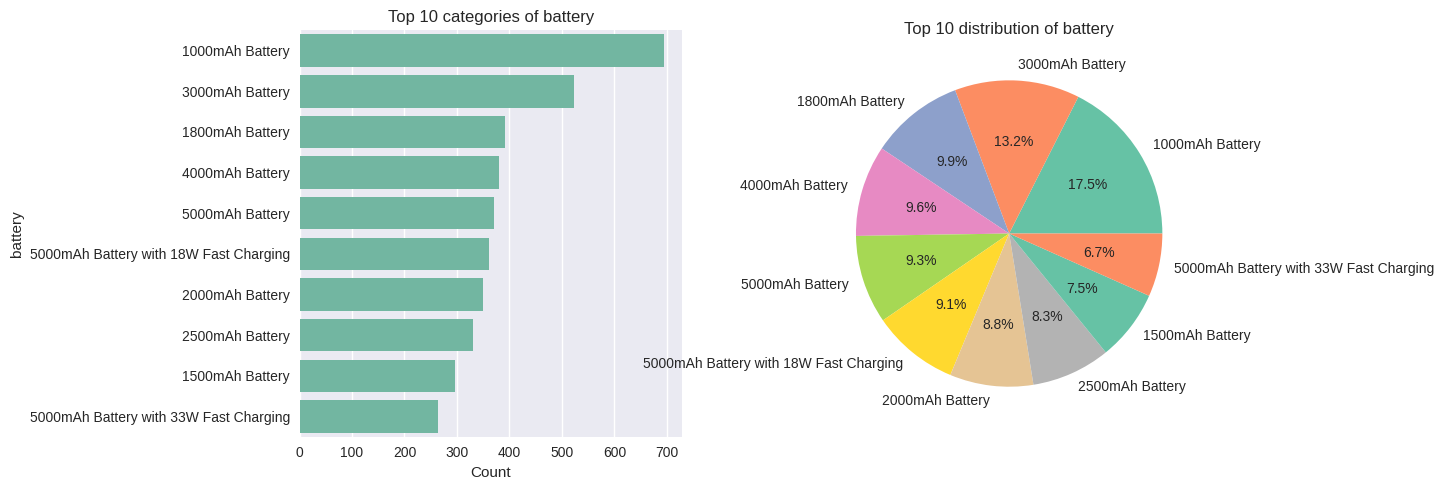

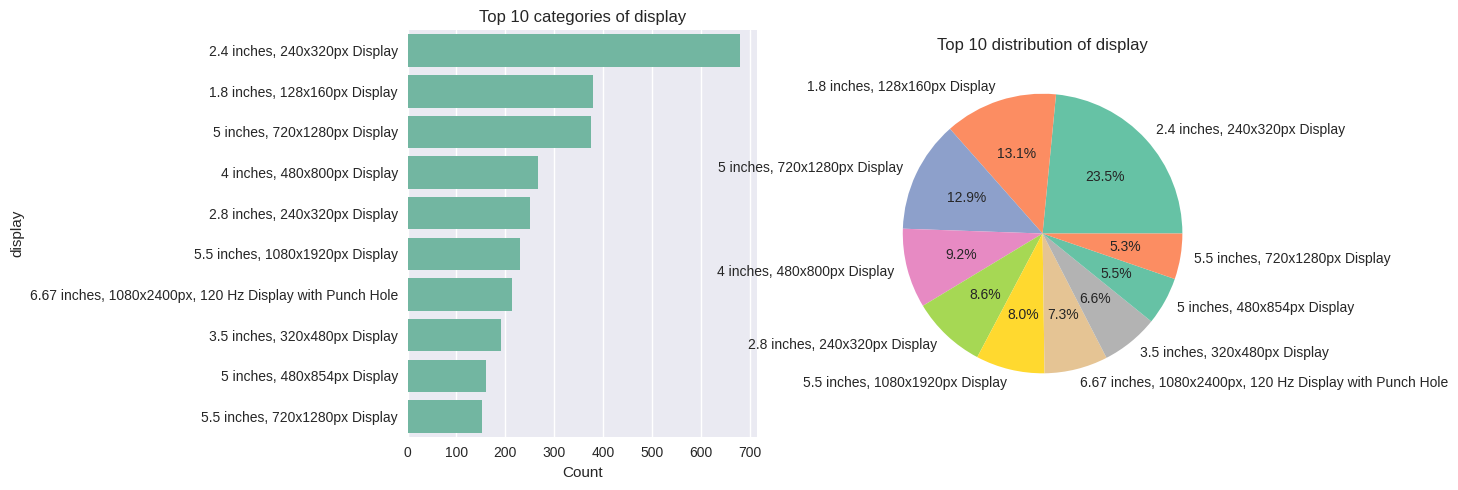

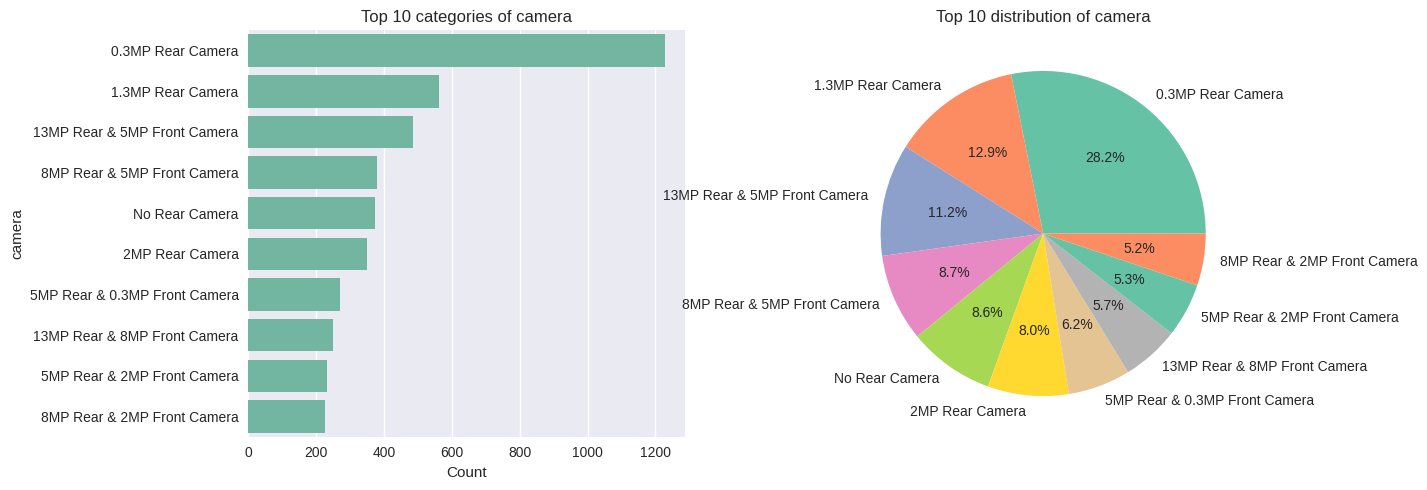

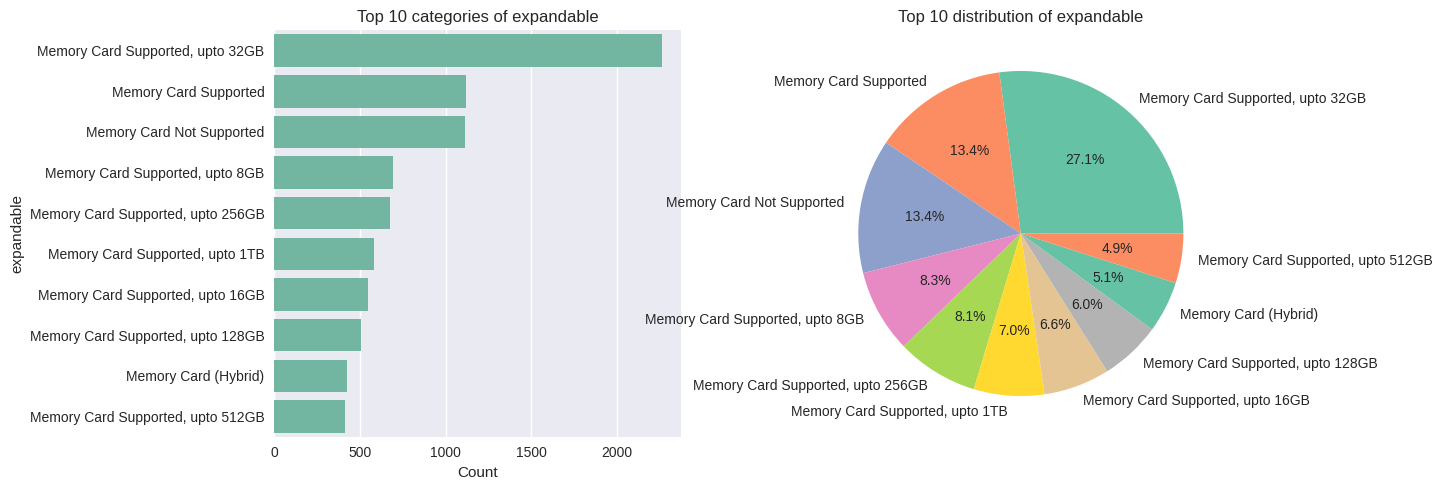

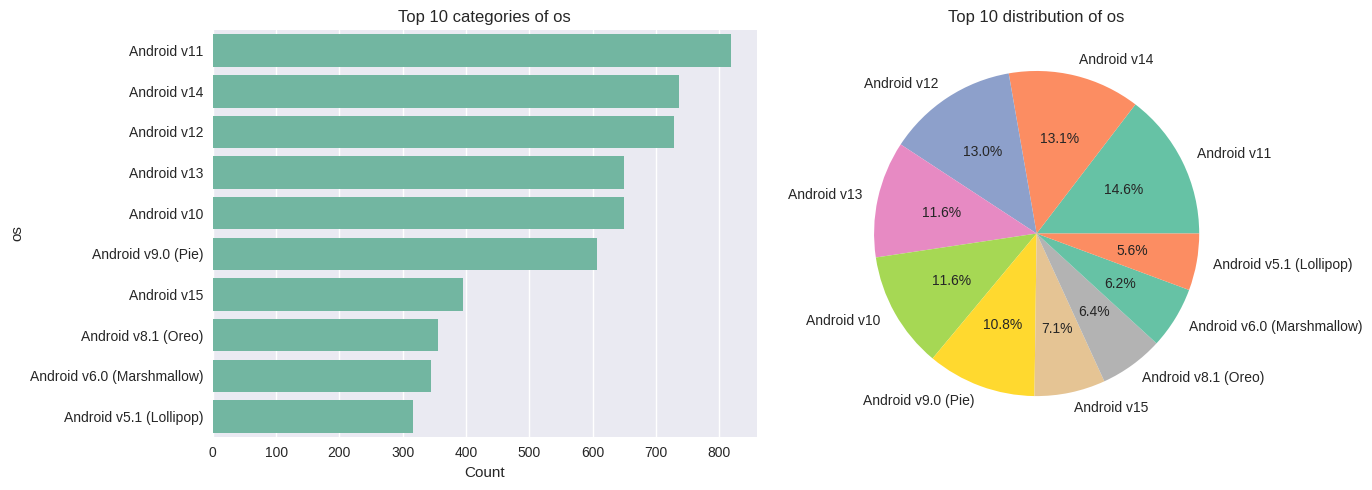

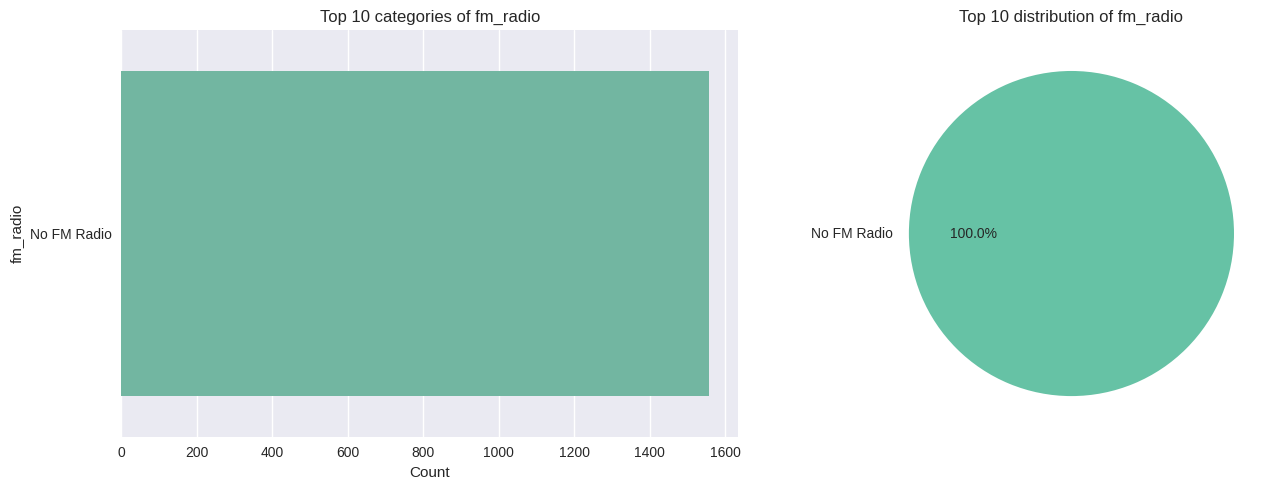

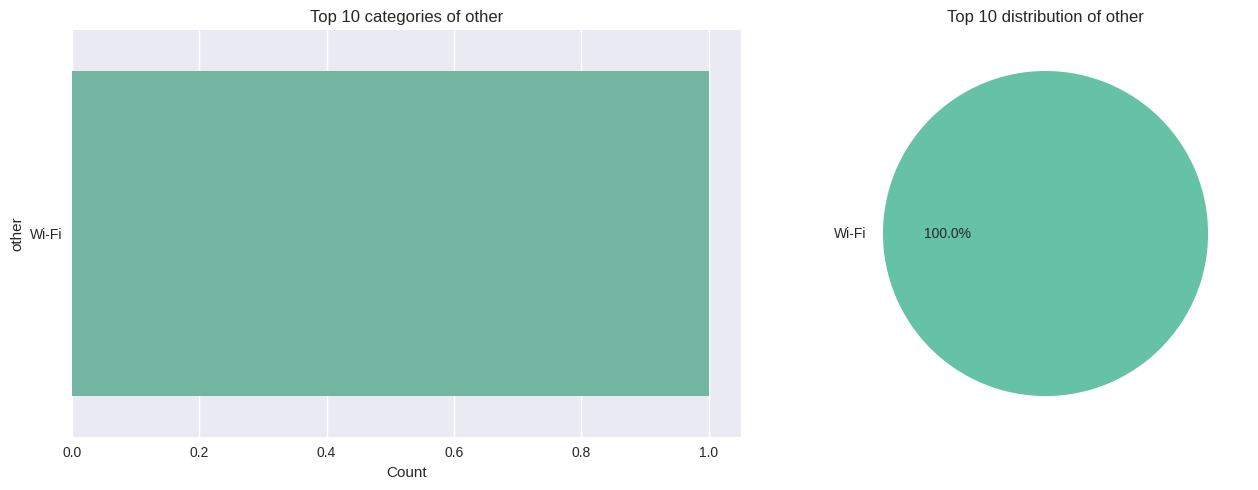

In [ ]:
cat_cols = raw_data.select_dtypes(exclude='number').columns

for col in cat_cols:
    # Lấy top 10 giá trị phổ biến nhất cho gọn
    value_counts = raw_data[col].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 hàng, 2 cột

    # Countplot
    sns.countplot(y=col,
                  data=raw_data,
                  order=value_counts.index,
                  ax=axes[0])
    axes[0].set_title(f"Top 10 categories of {col}")
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel(col)

    # Pie chart
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axes[1].set_title(f"Top 10 distribution of {col}")

    plt.tight_layout()
    plt.show()

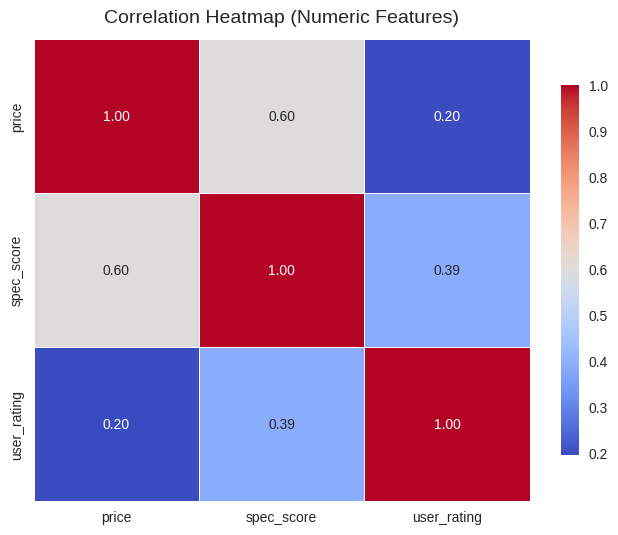

In [ ]:
corr = raw_data[num_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            annot=True,       # hiện giá trị hệ số tương quan
            cmap="coolwarm",  # bảng màu xanh-đỏ
            fmt=".2f",        # 2 chữ số thập phân
            linewidths=0.5,   # khoảng cách giữa các ô
            cbar_kws={"shrink": 0.8})  # thu nhỏ thanh màu bên cạnh

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, pad=12)
plt.show()

Tiền xử lý dữ liệu:

In [ ]:
raw_data['battery_num'] = raw_data['battery'].apply(extract_battery)
raw_data['fast_charging'] = raw_data['battery'].apply(extract_fast_charging)
raw_data['ram_num'] = raw_data['ram'].apply(extract_ram)
raw_data['rom_num'] = raw_data['ram'].apply(extract_rom)
raw_data['screen_size'] = raw_data['display'].apply(extract_screen_size)
raw_data['refresh_rate'] = raw_data['display'].apply(extract_refresh_rate)
raw_data['ppi'] = raw_data['display'].apply(extract_ppi)
raw_data['rear_camera_prio'] = raw_data['camera'].apply(extract_rear)
raw_data['front_camera_prio'] = raw_data['camera'].apply(extract_front_camera)
raw_data['expandable_storage'] = raw_data['expandable'].apply(extract_expandable_storage)
raw_data['os'] = raw_data['os'].apply(extract_os)
raw_data['cpu_brand'] = raw_data['cpu'].apply(extract_cpu_brand)
raw_data['cpu_speed'] = raw_data['cpu'].apply(extract_cpu_speed)
raw_data['cpu_core'] = raw_data['cpu'].apply(extract_cpu_core)
raw_data['is_5g'] = raw_data['connectivity'].apply(extract_is_5g)
raw_data['is_dual_sim'] = raw_data['connectivity'].apply(extract_is_dual_sim)
raw_data['is_nfc'] = raw_data['connectivity'].apply(extract_is_nfc)

In [ ]:
missing_ratio = (raw_data.isna().sum())/raw_data.shape[0] *100
print(missing_ratio)

name                   0.000000
price                  0.000000
spec_score             0.067877
user_rating            0.169693
connectivity           0.093331
cpu                   18.301375
ram                   10.699135
battery                1.170881
display                0.135754
camera                 0.169693
expandable            15.017818
os                     0.000000
fm_radio              86.789411
other                 99.991515
battery_num            1.170881
fast_charging          1.170881
ram_num               32.750721
rom_num               27.244188
screen_size           14.712371
refresh_rate          74.512133
ppi                   15.645681
rear_camera_prio       3.385372
front_camera_prio     26.972679
expandable_storage    28.202953
cpu_brand              0.000000
cpu_speed             22.518242
cpu_core              22.883082
is_5g                  0.000000
is_dual_sim            0.000000
is_nfc                 0.000000
dtype: float64


In [ ]:
keep_col = ['price', 'name', 'spec_score', 'user_rating','battery_num', 'fast_charging', 'ram_num', 'rom_num', 'os', 'screen_size', 'ppi', 'rear_camera_prio',
            'front_camera_prio', 'expandable_storage', 'cpu_brand', 'cpu_speed', 'cpu_core', 'is_5g', 'is_dual_sim', 'is_nfc']
raw_data = raw_data[keep_col] #dữ liệu sau khi bỏ bớt các đặc trưng không cần thiết

In [ ]:
num_feature = ['spec_score','ppi','ram_num','rom_num','cpu_speed', 'cpu_core', 'rear_camera_prio','front_camera_prio',
               'user_rating', 'battery_num', 'expandable_storage', 'screen_size', 'fast_charging', 'is_5g', 'is_dual_sim', 'is_nfc']
cat_feature = ['cpu_brand','os']
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in num_feature:
    outliers = detect_outliers_iqr(raw_data[col])
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in spec_score: 0
Number of outliers in ppi: 3
Number of outliers in ram_num: 116
Number of outliers in rom_num: 269
Number of outliers in cpu_speed: 64
Number of outliers in cpu_core: 0
Number of outliers in rear_camera_prio: 96
Number of outliers in front_camera_prio: 314
Number of outliers in user_rating: 853
Number of outliers in battery_num: 41
Number of outliers in expandable_storage: 1146
Number of outliers in screen_size: 0
Number of outliers in fast_charging: 0
Number of outliers in is_5g: 2818
Number of outliers in is_dual_sim: 1269
Number of outliers in is_nfc: 0


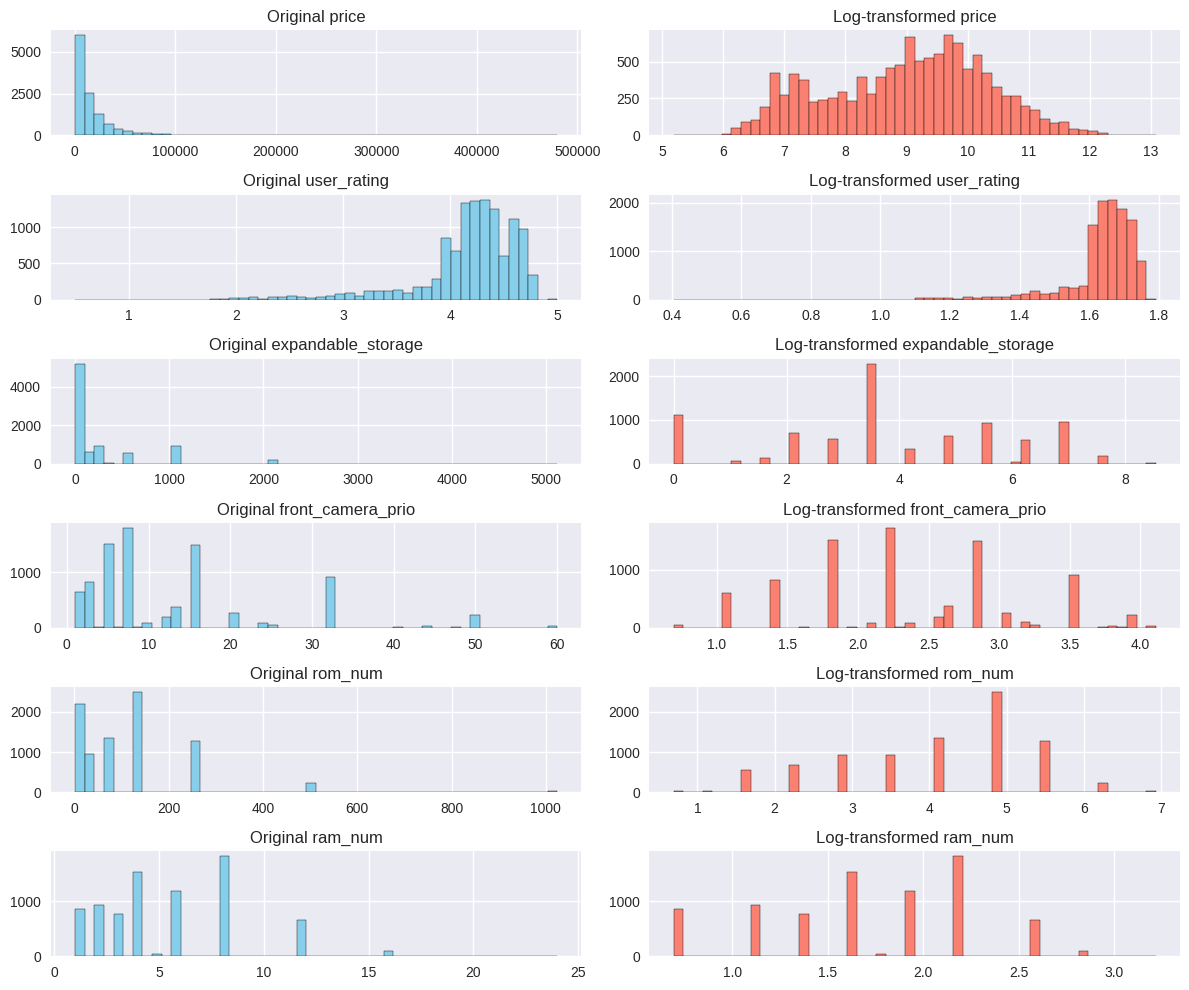

In [ ]:
df_log = raw_data.copy()

# Log transform biến nhiều outlier
for col in ['price', 'user_rating', 'expandable_storage', 'front_camera_prio', 'rom_num', 'ram_num']:
    df_log[col + '_log'] = np.log1p(raw_data[col])  # log(1+x) để tránh log(0)

# Vẽ so sánh
fig, axes = plt.subplots(6, 2, figsize=(12, 10))

for i, col in enumerate(['price', 'user_rating', 'expandable_storage', 'front_camera_prio', 'rom_num', 'ram_num']):
    # Histogram gốc
    axes[i,0].hist(raw_data[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i,0].set_title(f"Original {col}")

    # Histogram log
    axes[i,1].hist(df_log[col + '_log'].dropna(), bins=50, color='salmon', edgecolor='black')
    axes[i,1].set_title(f"Log-transformed {col}")

plt.tight_layout()
plt.show()

raw_data['user_rating'] = df_log['user_rating_log']
raw_data['expandable_storage'] = df_log['expandable_storage_log']
raw_data['front_camera_prio'] = df_log['front_camera_prio_log']
raw_data['rom_num'] = df_log['rom_num_log']
raw_data['ram_num'] = df_log['ram_num_log']

In [ ]:
#Chia target(price) thành biến phân loại để áp dụng các mô hình: Logistic Regression, SVM, Random Forest
low_threshold = raw_data['price'].quantile(0.25)
high_threshold = raw_data['price'].quantile(0.75)

def categorize_price(price):
    if price <= low_threshold:
        return 'low'
    elif price <= high_threshold:
        return 'medium'
    else:
        return 'high'
raw_data['price_category'] = raw_data['price'].apply(categorize_price)
target = 'price_category'

Bắt đầu phần 2

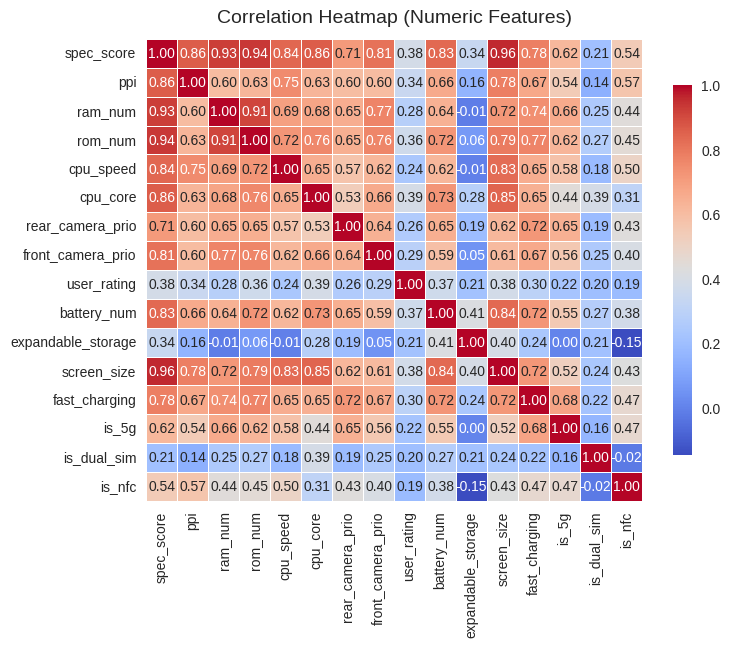

In [ ]:
cleaned_data = raw_data.copy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

corr = raw_data[num_feature].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            annot=True,       # hiện giá trị hệ số tương quan
            cmap="coolwarm",  # bảng màu xanh-đỏ
            fmt=".2f",        # 2 chữ số thập phân
            linewidths=0.5,   # khoảng cách giữa các ô
            cbar_kws={"shrink": 0.8})  # thu nhỏ thanh màu bên cạnh

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, pad=12)
plt.show()

Do dữ liệu gồm các đặc trưng phân loại rời rạc (cpu_brand, os), không có thứ tự tự nhiên nên chỉ sử dụng One-Hot Encoding

In [ ]:
# def run_model(model, num_feature, cat_feature, data, target, feature_range=(0, 1), test_size=0.2, random_state=42, n_neighbors=5, imputer='knn', scaler='minmax', n_components=0.95):

#  # ------------------------------
#  # 1. Chuẩn bị dữ liệu
#  # ------------------------------
#     x = cleaned_data[num_feature + cat_feature]
#     y = cleaned_data[target]
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

# # ------------------------------
# # 2. Xử lý numeric và categorical
# # ------------------------------
#     # Imputer
#     if imputer=='knn':
#         imputer = KNNImputer(n_neighbors=n_neighbors)
#     elif imputer=='mean':
#         imputer = SimpleImputer(strategy='mean')
#     elif imputer=='median':
#         imputer = SimpleImputer(strategy='median')
#     elif imputer=='most_frequent':
#         imputer = SimpleImputer(strategy='most_frequent')
#     else:
#         raise ValueError("Imputer phải là 'knn', 'mean', 'median' hoặc 'most_frequent'")

#     # Scaler
#     if scaler == 'minmax':
#         scaler_transformer = MinMaxScaler(feature_range)
#     elif scaler == 'standard':
#         scaler_transformer = StandardScaler()
#     else:
#         raise ValueError("Scaler phải là 'minmax' hoặc 'standard'")

#     numeric_transformer = Pipeline(steps=[
#         ('imputer', imputer),
#         ('scaler', scaler_transformer)
#     ])

#     #encoder
#     categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numeric_transformer, num_feature),
#             ('cat', categorical_transformer, cat_feature)
#         ]
#     )

# # ------------------------------
# # 3. Tạo pipeline tổng
# # ------------------------------

#     pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('pca', PCA(n_components=n_components)),
#         ('model', model)
#     ])

# # ------------------------------
# # 4. Train + đánh giá
# # ------------------------------
#     pipe.fit(x_train, y_train)
#     y_pred = pipe.predict(x_test)

#     # lấy tỷ lệ phương sai giữ lại
#     explained_var = pipe.named_steps['pca'].explained_variance_ratio_
#     total_var = explained_var.sum()

#     metrics = {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision (macro)": precision_score(y_test, y_pred, average='macro', zero_division=0),
#         "Recall (macro)": recall_score(y_test, y_pred, average='macro', zero_division=0),
#         "F1-score (macro)": f1_score(y_test, y_pred, average='macro', zero_division=0),
#         "Explained Variance (%)": round(total_var * 100, 2)
#     }

#     return metrics, pipe

Thử mô hình Logistic Regression với các cấu hình khác nhau

In [ ]:
#Logistic Regression với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#Logistic Regression với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.862171
Precision (macro)        0.864585
Recall (macro)           0.860116
F1-score (macro)         0.862180
Explained Variance (%)  95.030000


Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.854538
Precision (macro)        0.856602
Recall (macro)           0.853194
F1-score (macro)         0.854777
Explained Variance (%)  89.920000


Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.861747
Precision (macro)        0.864390
Recall (macro)           0.859310
F1-score (macro)         0.861609
Explained Variance (%)  95.000000


Các độ đo của mô hình LR với Simple Imputer sử dụng mean, standard scaler, PC

Thử mô hình SVC với các cấu hình khác nhau

In [ ]:
#SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.872774
Precision (macro)        0.880750
Recall (macro)           0.865046
F1-score (macro)         0.872129
Explained Variance (%)  95.030000


Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.860051
Precision (macro)        0.863751
Recall (macro)           0.857436
F1-score (macro)         0.860449
Explained Variance (%)  89.920000


Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.874894
Precision (macro)        0.881634
Recall (macro)           0.868380
F1-score (macro)         0.874394
Explained Variance (%)  95.000000


Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, standard scaler

Thử mô hình Random Forest với các cấu hình khác nhau

In [ ]:
#Random Forest không cần encoder trước
#Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.874470
Precision (macro)        0.876106
Recall (macro)           0.873859
F1-score (macro)         0.874962
Explained Variance (%)  95.030000


Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.864716
Precision (macro)        0.866176
Recall (macro)           0.864389
F1-score (macro)         0.865255
Explained Variance (%)  89.920000


Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.871077
Precision (macro)        0.872025
Recall (macro)           0.871292
F1-score (macro)         0.871650
Explained Variance (%)  95.000000


Các độ đo của mô hình Random Forest với Simp